### Normalização ou Padronização de Atributos ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('dados/municipios_mba.csv')

In [2]:
for var in data:
    print(f'{var} - tipo: {data[var].dtype.name}')

gid - tipo: int64
UF - tipo: object
nome - tipo: object
Censo - tipo: float64
PIB - tipo: float64
pop - tipo: int64
classe - tipo: int64
desemprego - tipo: float64
pop_sanea - tipo: float64
expec_vida - tipo: float64
pobreza - tipo: float64
IDH - tipo: int64
urbaniz - tipo: object
dens_pop_urbana - tipo: object


Vamos analisar alguns atributos numéricos

In [3]:
atts = ['pobreza', 'IDH', 'PIB']
atts_cat = ['pobreza', 'IDH', 'PIB', 'UF', 'nome']

<AxesSubplot:>

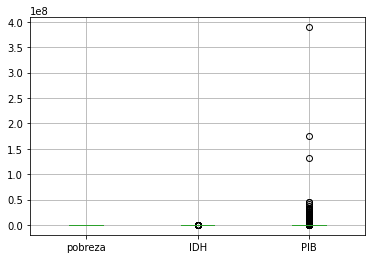

In [4]:
data.boxplot(atts)

Muitos métodos, principalmente de aprendizado de máquina, utilizam-se de medidas de distância para aprender. A técnica mais corriqueira é a de distância euclidiana

In [5]:
def dist_euclidiana(a, b):
    return np.sqrt(np.sum((a-b) ** 2))

Vamos verificar com um exemplo

In [6]:
np.random.seed(2)
select_data = np.random.rand(data.shape[0]) < 0.0015

subdata = data[select_data].copy().reset_index()
size = subdata[atts].shape[0]

print(f'Exemplos selecionados: {size}')
subdata

Exemplos selecionados: 5


,index,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,1690,3099,MINAS GERAIS,Campos Gerais,2010.0,240981.671875,27964,1,6.8,76.217741,77.3,4.3,738,NaN,NaN
1,2737,2336,PARAÍBA,São Domingos,2010.0,12841.704102,2822,1,9.2,49.034312,74.3,16.9,657,NaN,NaN
2,3412,1280,PIAUÍ,Campo Largo do Piauí,2010.0,18738.593750,7035,1,4.6,29.272712,71.4,21.2,643,NaN,NaN
3,3468,949,PIAUÍ,Jardim do Mulato,2010.0,14268.646484,4318,1,6.0,29.503772,70.4,21.9,647,NaN,NaN
4,4704,5000,SANTA CATARINA,Xaxim,2010.0,538854.125000,25444,2,8.3,74.267921,79.5,0.9,778,NaN,NaN


#### Normalização ####

Há várias técnicas de normalização, que dependem do cenário verificado.

Alguns desses métodos também são chamados de *scalers*, reescalamento de atributos ou *feature (re)scaling*

- mín-máx
- média
- robusta (quantis)
- z-score (whitening, standard scaler) -> **padronização**
- normas:
    - L1 (ou de soma unitária)
    - L2 (euclidiana)
    - L$_{\infty}$ (ou pelo máximo)

- Mín-máx
    - aquela normalização de termômetros marota
    - a partir de um valor x, em um intervalo \[a, b\], gera-se um valor x'
        - $x' = a + \dfrac{[x-min(x)](b-a)}{max(x) - min(x)}$

    - considerando uma normalização, temos o intervalo = \[0, 1\]

        - $x' = 0 + \dfrac{[x-min(x)](1-0)}{max(x) - min(x)}$
        - $x' = \dfrac{x-min(x)}{max(x) - min(x)}$

- Média

    - Nesse método, a média se torna zero, pois assume o centro da normalização

        - $x' = \dfrac{x-\bar{x}}{max(x)-min(x)}$

    - apresenta valores negativos

- Robusta

    - gera um atributo x' centralizado em relação à **mediana**, normalizado com relação aos percentis 75 e 25 (Q3 e Q1, respectivamente)

        - $x' = \dfrac{x - median(x)}{Q_{75}(x) - Q_{25}(x)}$

- Padronização *z-score* (whitening)
    - gera um atributo x' centralizado com relação à média e cujo desvio padrão passa a ser unitário

        - $x' = \dfrac{x-\bar{x}}{\sigma}$

        - propriedades interessantes
            - média: 0
            - desvio-padrão: 1
            - muito adequado para se utilizar com a distância euclidiana

- Normas
    - mais comuns para normalizar instâncias, não atributos

    - L1 (soma unitária)
        - gera um atributo x', onde a soma dos valores é igual a 1
            - isso permite interpretar o atributo x' como um vetor de distribuição de probabilidade

        - $x' = \dfrac{x}{||x_i||_1}$, onde $||x_i||_1$ é a norma do vetor x
            - $||x_i||_1 = \Sigma_i |x_i|$

    - L2 (euclidiana)
        - $x' = \dfrac{x}{||x_i||_2}$

            - $||x_i||_2 = \sqrt{\Sigma_{i=1}^n x_{i}^2}$

    - $L_{\infty}$ (também chamada de Infinita, ou Chessboard)

        - $x' = \dfrac{x}{||x_i||_{\infty}}$
            
            - $||x_i||_{\infty} = max_i(x_i)$

Entretanto, ao realizar a análise comparativa, não é interessante utilizar os atributos normalizados. Nesse contexto, é mais interessante realizar os cálculos com os valores normalizados, mas, a título de análise, manter os valores originais para leitura

Normalizadores do **ScikitLearn**